# Perceptron

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('placement.csv')

In [4]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


<Axes: xlabel='cgpa', ylabel='resume_score'>

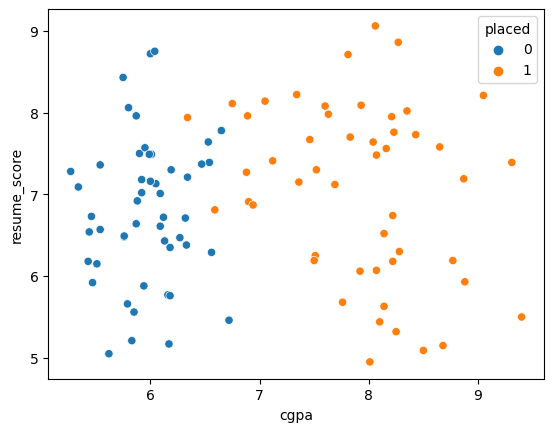

In [5]:
sns.scatterplot(x=df['cgpa'],y=df['resume_score'],hue=df['placed'])

In [6]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [7]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [8]:
p.fit(X,y)

Perceptron()

In [9]:
p.coef_
# gives values for weights of different features

array([[ 40.26, -36.  ]])

In [10]:
p.intercept_
# gives value of extra intercept

array([-25.])

In [11]:
!pip install mlxtend

c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

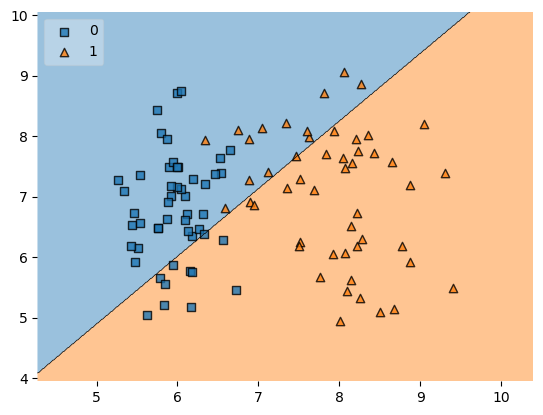

In [12]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values,y.values,clf=p,legend=2)

# Perceptron trick

In [13]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

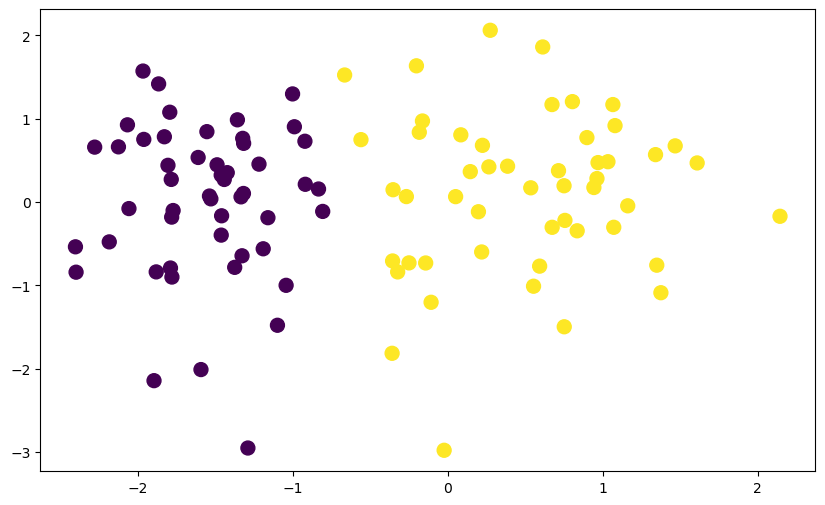

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100)

In [15]:
def step(z):
    return 1 if z>0 else 0

def perceptron(X,y):
    X=np.insert(X,0,1,axis=1)
    weights=np.ones(X.shape[1])
    lr=0.1
    for i in range(1000):
        j=np.random.randint(0,100)
        y_hat=step(np.dot(X[j],weights))
        weights = weights + lr *(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

In [16]:
intercept_,coef_ = perceptron(X,y)

In [17]:
print(coef_)
print(intercept_)

[1.35653836 0.08752851]
0.9


In [18]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [19]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

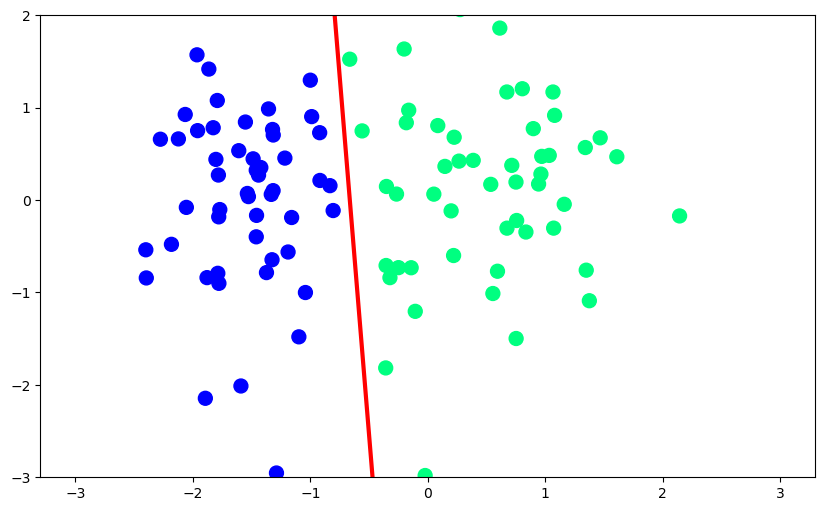

In [20]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Loss function

In [21]:
X,y= make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=15)

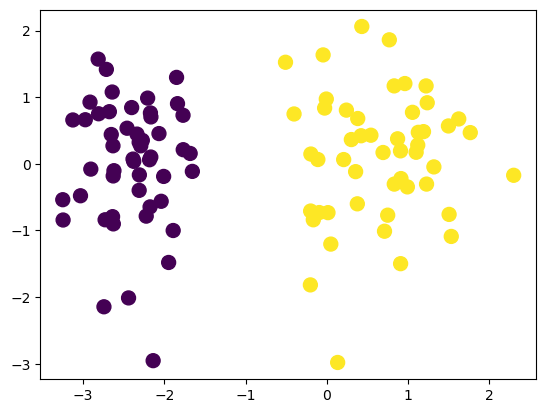

In [23]:
plt.scatter(X[:,0],X[:,1],c=y,s=100)

In [24]:
def perceptron(X,y):
    w1=w2=b=1
    lr=0.1
    for j in range(1000):
        for i in range(X.shape[0]):
            z=w1*X[i][0]+w2*X[i][1]+b
            if z*y[i]<0:
                w1=w1+lr*y[i]*X[i][0]
                w2=w2+lr*y[i]*X[i][1]
                b=b+lr*y[i]
    return w1,w2,b


In [25]:
w1,w2,b=perceptron(X,y)

In [26]:
m=-(w1/w2)
c=-(b/w2)
print(m,c)

-4.531321834268464 -5.851870329508209


(-3.0, 2.0)

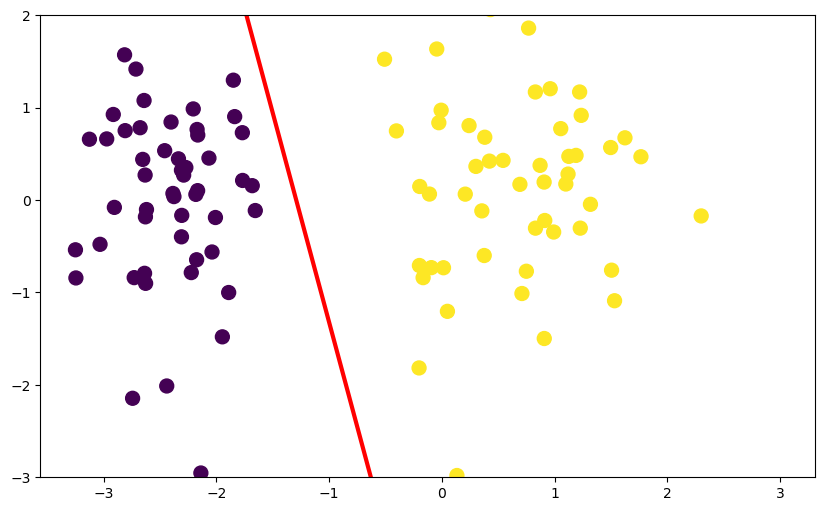

In [32]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,s=100)
plt.ylim(-3,2)